# <font color = #119fbf>**Clusterização com K-Means e DBSCAN**</font>

* Programa de Pós-Graduação em Engenharia Elétrica e de Computação (PPGEEC)
* Introdução à Ciências de Dados - UFC *Campus* Sobral – 2023.1
* Andressa Gomes Moreira - andressagomes@alu.ufc.br

**Importações**

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

### Dataset Iris 🌷🌸

O conjunto de dados **“Iris.csv”** é composto por 150 amostras e 6 atributos. Cada amostra refere-se a características da uma planta.
Os atributos utilizados nesse exemplos são:

1. PetalLengthCm - Comprimento da sépala;
2. PetalWidthCm - Largura da sépala;
3. Species - Tipo de espécie.

In [ ]:
iris = datasets.load_iris()
X = iris.data[:, 2:]
y = iris.target

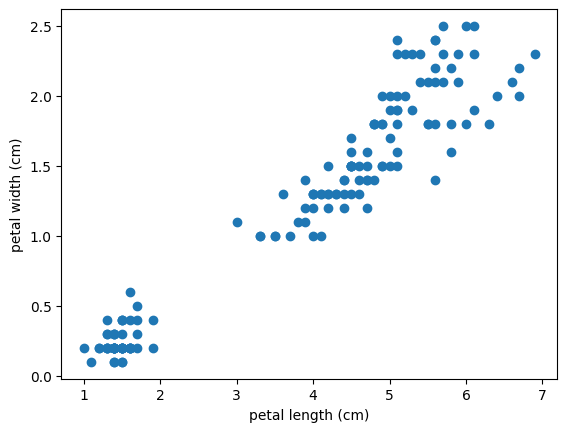

In [ ]:
fig, axs = plt.subplots()
axs.scatter(X[:, 0], X[:, 1])

plt.xlabel(iris.feature_names[2])
plt.ylabel(iris.feature_names[3])

plt.show()

# K-Means

**Curva de Elbow**

A técnica do cotovelo é usada para determinar o número ideal de clusters em um algoritmo K-means (número de K).

A ideia principal é plotar o número de clusters (k) no eixo x e a soma das distâncias ao quadrado de cada ponto ao centróide de seu cluster (inércia).

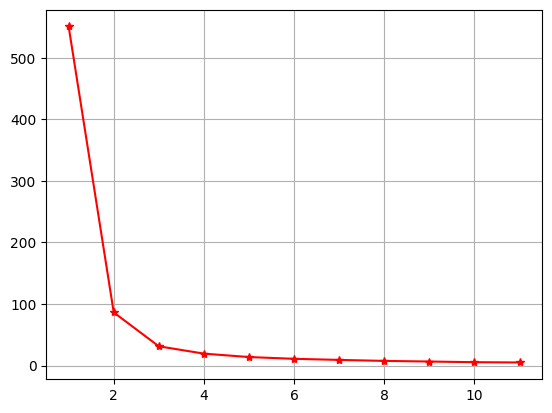

In [ ]:
k_range = range(1, 12)
inertia = []

for k in k_range:
    inertia.append(KMeans(n_clusters=k, random_state=42).fit(X).inertia_)

fig, ax = plt.subplots()
ax.plot(k_range, inertia, 'b*-', color='r')
plt.grid(True)
plt.show()

**Treinamento do modelo**

Parâmetros:
- *n_clusters:* Número de clusters a serem formados

In [ ]:
# K = 2
modelo_k2 = KMeans(n_clusters=2, random_state=42)
modelo_k2.fit(X)

# K = 3
modelo_k3 = KMeans(n_clusters=3, random_state=42)
modelo_k3.fit(X)

KMeans(n_clusters=3, random_state=42)

**Análise dos resultados:**

- *labels_:* Rótulos de cluster para cada ponto no conjunto de dados;
- *silhouette_score:* Métrica para avaliar a qualidade da clusterização. Mede a similaridade média de cada amostra com o seu próprio cluster em relação aos outros clusters.
  - silhouette_score = 1: Boa separação entre os clusters;
  - silhouette_score = 0: Sobreposição entre os clusters;
  - silhouette_score = -1: O objeto pode ter sido atribuído ao cluster errado e está mais próximo dos objetos de outros clusters do que do seu próprio cluster.

In [ ]:
# K = 2
labels_k2 = modelo_k2.labels_
print(f'K=2 -> {silhouette_score(X, labels_k2)}')

# K = 3
labels_k3 = modelo_k3.labels_
print(f'K=3 -> {silhouette_score(X, labels_k3)}')

K=2 -> 0.7653904101258123
K=3 -> 0.6604800083974887


**Visualizando distribuição dos resultados K-Means**

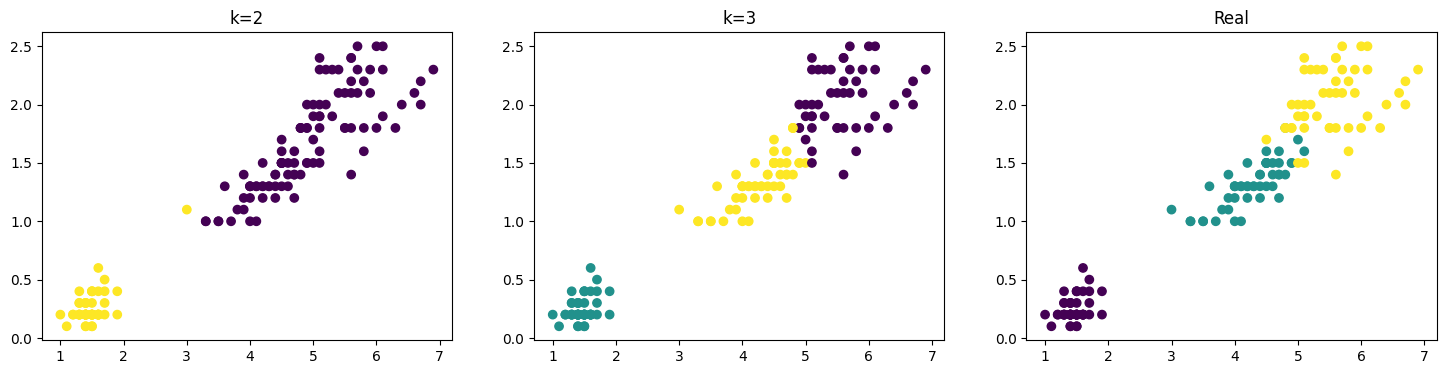

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(18,4))

axs[0].scatter(X[:, 0], X[:, 1], c=labels_k2)
axs[1].scatter(X[:, 0], X[:, 1], c=labels_k3)
axs[2].scatter(X[:, 0], X[:, 1], c=y)

axs[0].set_title('k=2')
axs[1].set_title('k=3')
axs[2].set_title('Real')

plt.show()

# DBSCAN

Parâmetros:
- *eps:* Distância máxima que define a vizinhança de um ponto;
- *min_samples:* Número mínimo de pontos em uma vizinhança para garantir uma densidade desejada.


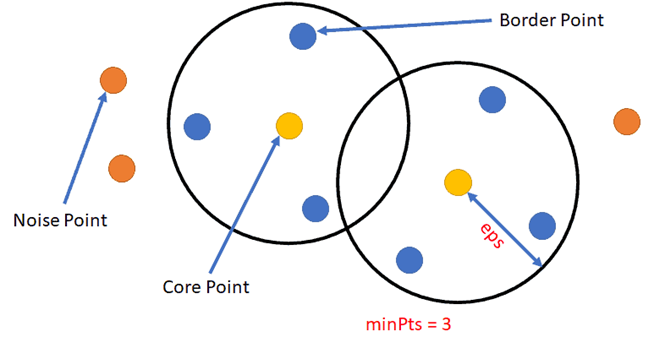

In [ ]:
dbscan = DBSCAN(eps=0.5, min_samples=3)
dbscan.fit(X)

DBSCAN(min_samples=3)

**Análise dos resultados:**

- *labels_:* Rótulos atribuídos a cada amostra de acordo com a clusterização realizada pelo DBSCAN.
- *silhouette_score:* Métrica para avaliar a qualidade da clusterização. Mede a similaridade média de cada amostra com o seu próprio cluster em relação aos outros clusters.
  - silhouette_score = 1: Boa separação entre os clusters;
  - silhouette_score = 0: Sobreposição entre os clusters;
  - silhouette_score = -1: O objeto pode ter sido atribuído ao cluster errado e está mais próximo dos objetos de outros clusters do que do seu próprio cluster.

In [ ]:
labels_dbscan = dbscan.labels_
silhouette_score(X, labels_dbscan)

0.7669465622770762

In [ ]:
labels_dbscan

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

**Visualizando distribuição dos resultados DBSCAN**

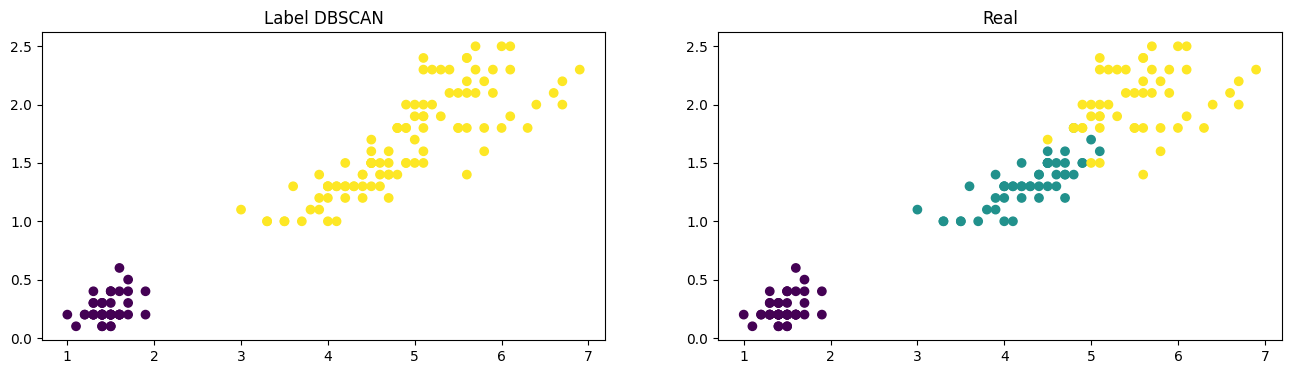

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(16,4))

axs[0].scatter(X[:, 0], X[:, 1], c=labels_dbscan)
axs[1].scatter(X[:, 0], X[:, 1], c=y)

axs[0].set_title('Label DBSCAN')
axs[1].set_title('Real')

plt.show()